<a href="https://colab.research.google.com/github/NathanaelGracedo/PCVK_2025/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **D1. Operasi Citra Sederhana**

**Step 1: Akses folder images pada Google Drive**

In [26]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Step 2: Import Library CV dan numpy**

In [12]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

**Step 3:Transformasi Linier Brightness**

 Mengubah tingkat kecerahan citra 
------------------------------------
Masukkan nilai kecerahan: 45


/tmp/ipython-input-2023345896.py:26: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


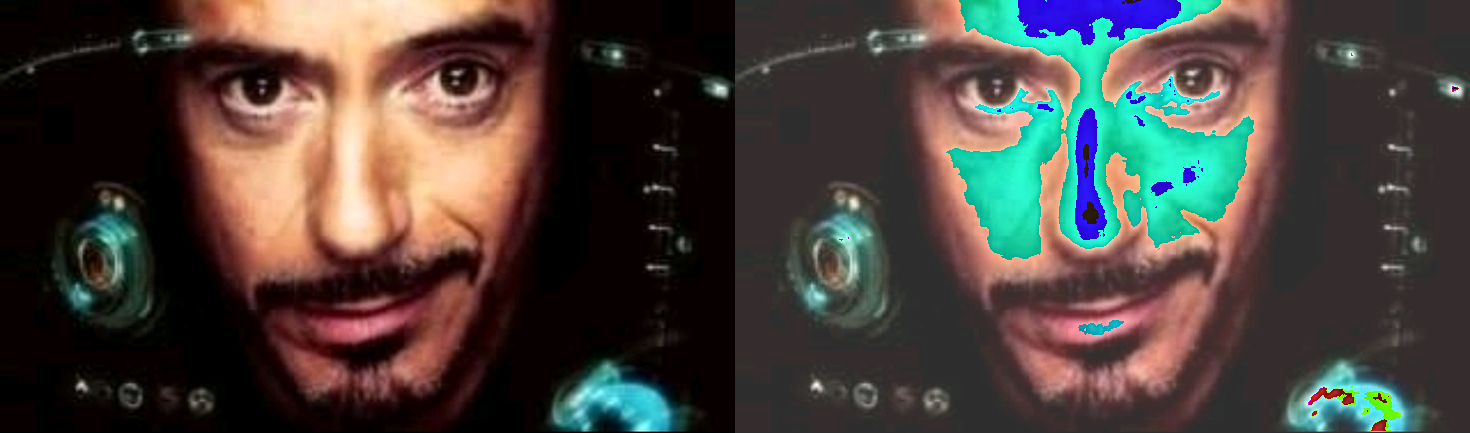

In [5]:
import os

print(' Mengubah tingkat kecerahan citra ')
print('------------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

image_path = '/content/gdrive/MyDrive/PCVK_img/jarvis.jpg'

if not os.path.exists(image_path):
    print(f"Error: Image file not found at {image_path}")
else:
    original = cv.imread(image_path)

    if original is None:
        print(f"Error: Could not load image from {image_path}. Check if the file is a valid image.")
    else:
        brightness_image = np.zeros(original.shape, original.dtype)

        #akses per piksel
        for y in range(original.shape[0]):
            for x in range(original.shape[1]):
                for c in range(original.shape[2]):
                    brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

        #cara simple tanpa for loop
        #brightness_image = cv.convertScaleAbs(original, beta=brightness)

        final_frame = cv.hconcat((original, brightness_image))
        cv2_imshow(final_frame)

# **Tugas Praktikum D1**

**1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:**

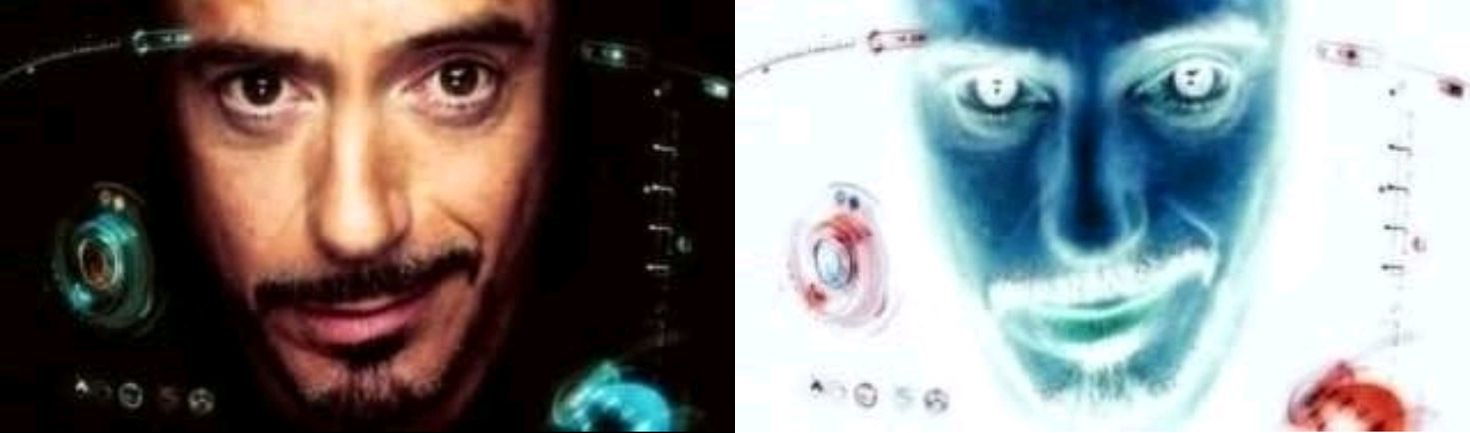

In [6]:
image_inverse = original.copy()
image_inversed = 255 - image_inverse
final_frame = cv.hconcat((image_inverse, image_inversed))

cv2_imshow(final_frame)

**2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:**

Masukkan nilai kecerahan[-255 - 255]:50
Masukkan kontras[1.0 - 3.0]:2.


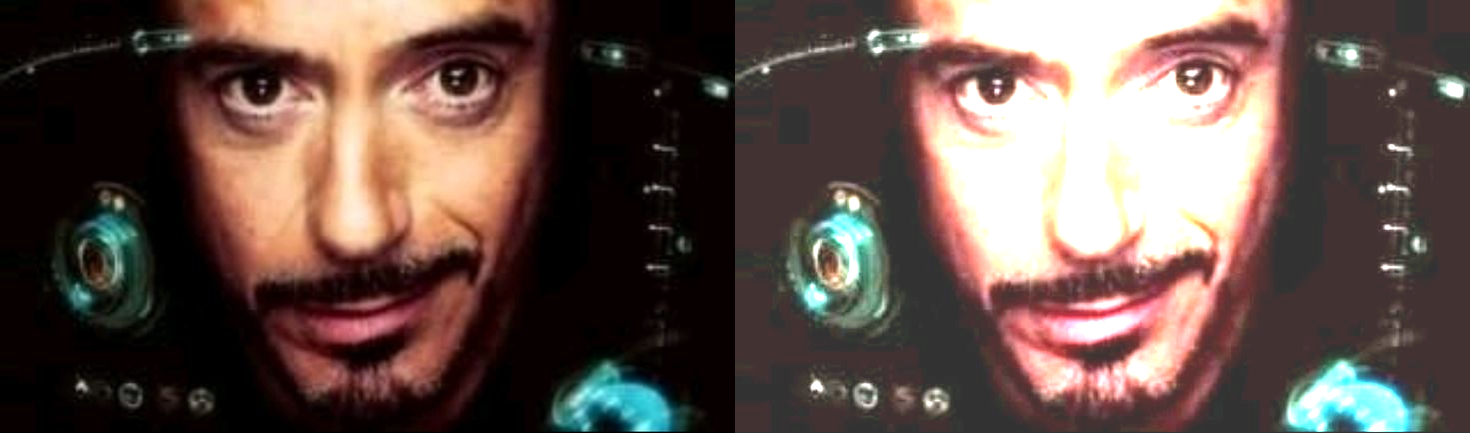

In [7]:
kontras_img = original.copy()
try:
  bright = int(input('Masukkan nilai kecerahan[-255 - 255]:'))
  kontrs = float(input('Masukkan kontras[1.0 - 3.0]:'))
except ValueError:
  print('Error, NaN')

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      kontras_img[y,x,c] = np.clip(kontrs * original[y,x,c] + bright, 0, 255)

frame_kontras = cv.hconcat((original, kontras_img))
cv2_imshow(frame_kontras)

3. **Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:**

mengubah tingkat kecerahan logaritmic log
--------------------------------
Masukkan nilai kecerahan:25


/tmp/ipython-input-3003741044.py:17: RuntimeWarning: overflow encountered in scalar add
  s = c * np.log(1 + r)   # rumus logaritmik
/tmp/ipython-input-3003741044.py:17: RuntimeWarning: divide by zero encountered in log
  s = c * np.log(1 + r)   # rumus logaritmik


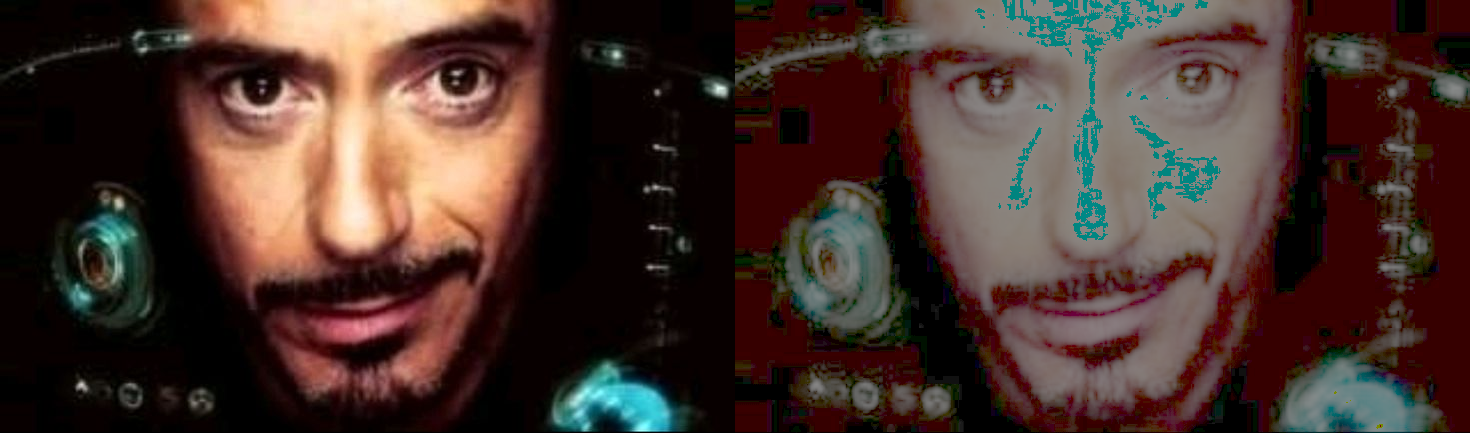

In [9]:
print('mengubah tingkat kecerahan logaritmic log')
print('--------------------------------')

try:
  brightnes = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, NaN')

brightnes_img = np.zeros(original.shape, original.dtype)

# transformasi logaritmik
c = brightnes
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for ch in range(original.shape[2]):
            r = original[y, x, ch]
            s = c * np.log(1 + r)   # rumus logaritmik
            brightnes_img[y, x, ch] = np.clip(s, 0, 255)


final_cerah_log = cv.hconcat((original, brightnes_img))
cv2_imshow(final_cerah_log)

4. **Implementasikan transformasi grayscale menggunakan metode averaging, lightness,dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori**

**Averaging**

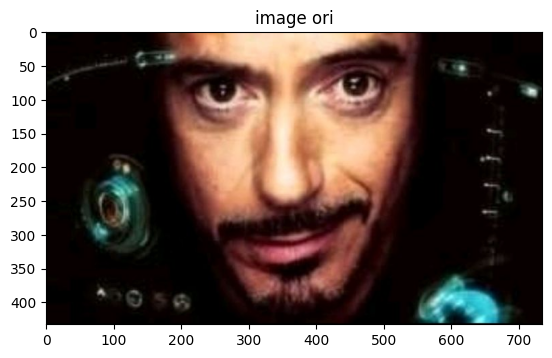

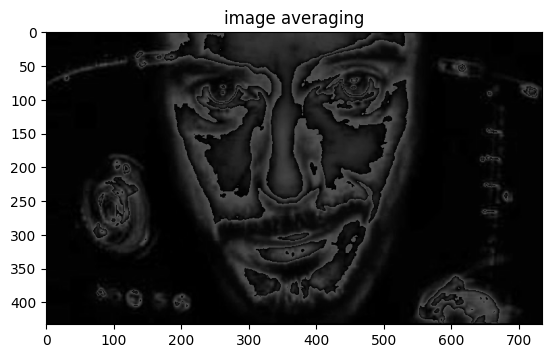

In [13]:
copyorigin = cv.cvtColor(original, cv.COLOR_BGR2RGB)
avg_img = copyorigin.copy()
array_img = np.asarray(avg_img)
r = array_img[:, :, 0]
g = array_img[:, :, 1]
b = array_img[:, :, 2]

gray_avg = (r + g + b) / 3
avg_img[:, :, 0] = gray_avg
avg_img[:, :, 1] = gray_avg
avg_img[:, :, 2] = gray_avg

plt.imshow(copyorigin)
plt.title('image ori')
plt.show()
plt.imshow(avg_img)
plt.title('image averaging')
plt.show()

**Lightness**

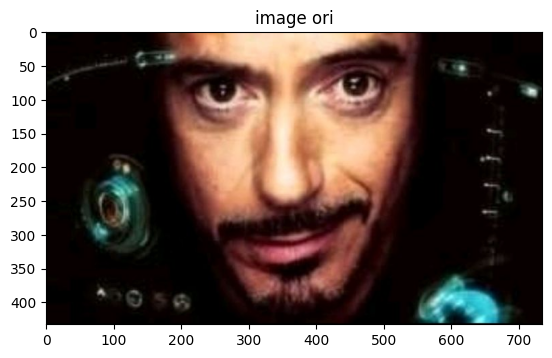

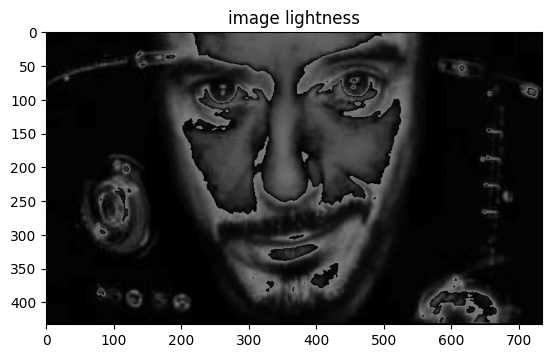

In [14]:
copyorigin = cv.cvtColor(original, cv.COLOR_BGR2RGB)
lightness_img = copyorigin.copy()
array_img = np.asarray(lightness_img)
r = array_img[:, :, 0]
g = array_img[:, :, 1]
b = array_img[:, :, 2]

gray_lightness = ((array_img.max(axis=2) + array_img.min(axis=2)) / 2)

lightness_img[:, :, 0] = gray_lightness
lightness_img[:, :, 1] = gray_lightness
lightness_img[:, :, 2] = gray_lightness


plt.imshow(copyorigin)
plt.title('image ori')
plt.show()
plt.imshow(lightness_img)
plt.title('image lightness')
plt.show()


**Luminance**

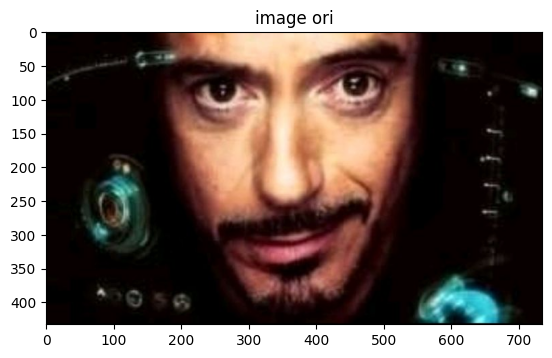

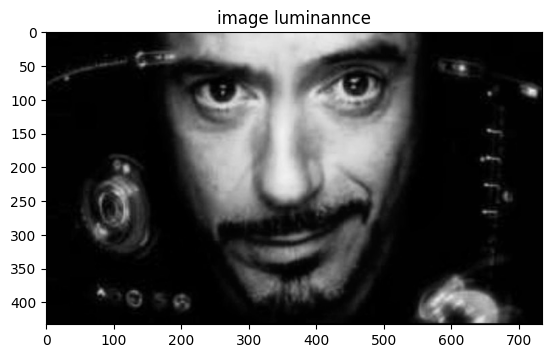

In [15]:
luminanceImg = copyorigin.copy()
array_img = np.asarray(luminanceImg)
r = array_img[:, :, 0]
g = array_img[:, :, 1]
b = array_img[:, :, 2]

gray_lumi = (0.21*r) + (0.72*g) + (0.07*b)

luminanceImg[:, :, 0] = gray_lumi
luminanceImg[:, :, 1] = gray_lumi
luminanceImg[:, :, 2] = gray_lumi


plt.imshow(copyorigin)
plt.title('image ori')
plt.show()
plt.imshow(luminanceImg)
plt.title('image luminannce')
plt.show()

5. **Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:**

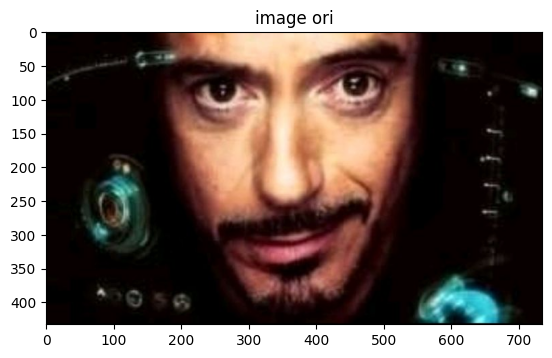

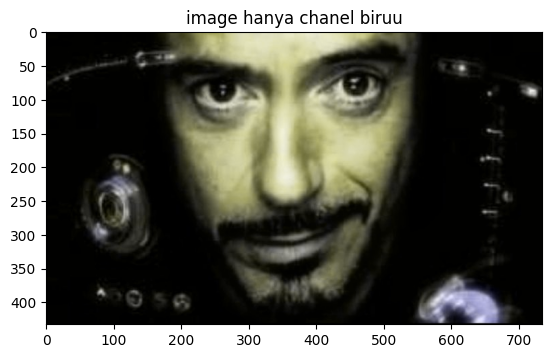

In [16]:
blue_img = copyorigin.copy()
array_img = np.asarray(blue_img)
r = array_img[:, :, 0]
g = array_img[:, :, 1]
b = array_img[:, :, 2]

gray_lumi = (0.21*r) + (0.72*g) + (0.07*b)

blue_img[:, :, 0] = gray_lumi
blue_img[:, :, 1] = gray_lumi

plt.imshow(copyorigin)
plt.title('image ori')
plt.show()
plt.imshow(blue_img)
plt.title('image hanya chanel biruu')
plt.show()

# **D2 Operasi Aritmatika dan Logika**

1. **Buat Gamma Correction sesuai dengan petunjuk berikut**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 0.70


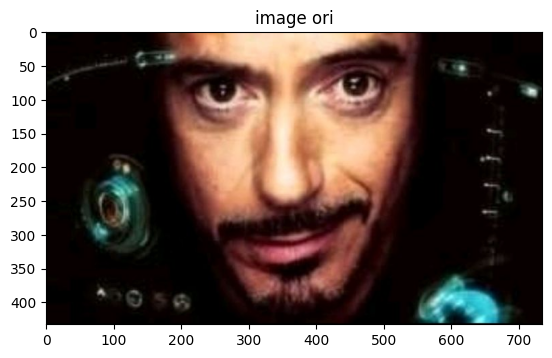

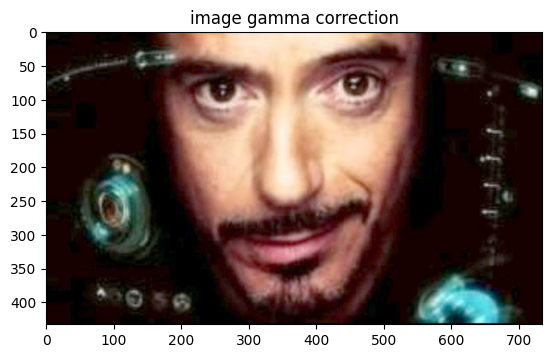

In [19]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = float(input('Masukkan nilai Gamma: ')) # Changed to float for potential fractional gamma values
except ValueError:
  print('Error, not a number')

gamma_img = copyorigin.copy()
gamma_corrected = np.zeros(copyorigin.shape, copyorigin.dtype)

# Apply gamma correction
for y in range(copyorigin.shape[0]):
    for x in range(copyorigin.shape[1]):
        for c in range(copyorigin.shape[2]):
            # Normalize pixel values to the range [0, 1]
            normalized_pixel = copyorigin[y, x, c] / 255.0
            # Apply gamma correction formula
            corrected_pixel = np.power(normalized_pixel, gamma)
            # Scale back to the range [0, 255]
            gamma_corrected[y, x, c] = np.clip(corrected_pixel * 255.0, 0, 255)

plt.imshow(copyorigin)
plt.title('image ori')
plt.show()
plt.imshow(gamma_corrected)
plt.title('image gamma correction')
plt.show()

 2. **Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi
citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit).
Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0
(000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit.
Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

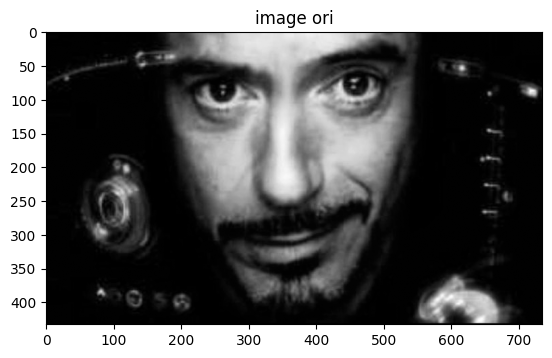

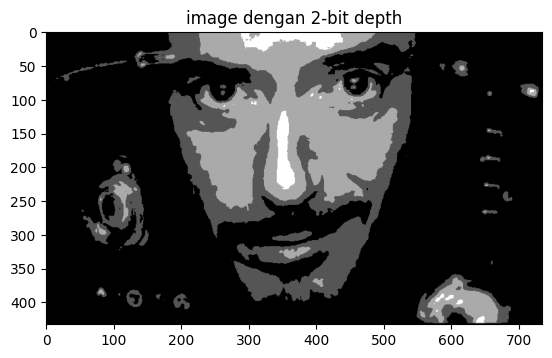

In [20]:
bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
origelap = cv.cvtColor(copyorigin, cv.COLOR_BGR2GRAY)

quantized_img = np.round(origelap / level) * level

plt.imshow(origelap, cmap='gray')
plt.title('image ori')
plt.show()
plt.imshow(quantized_img, cmap='gray')
plt.title(f'image dengan {bit_depth}-bit depth')
plt.show()

3. **Buat modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

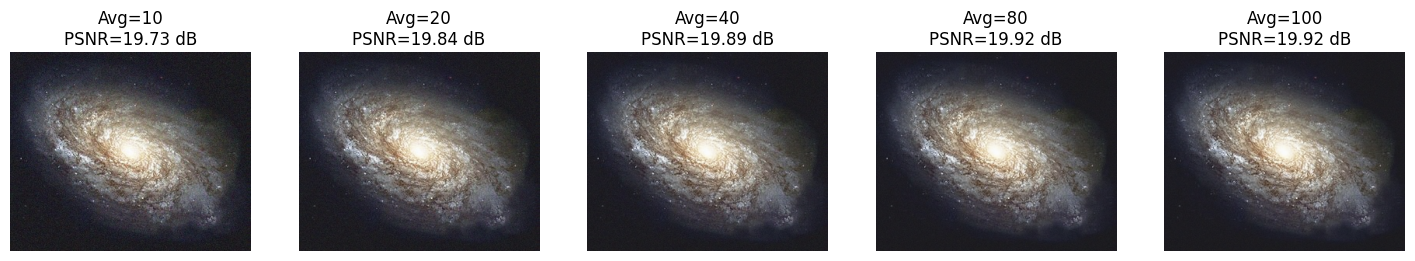

In [31]:
import glob

# Citra asli
original_noises = cv.imread('/content/gdrive/MyDrive/PCVK_img/galaxy.jpg')

# Semua citra noisy dari folder
cv_img = []
for img in glob.glob('/content/gdrive/MyDrive/PCVK_img/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

cv_img = np.array(cv_img)

# Fungsi MSE
def mse(img1, img2):
    return np.mean((img1.astype("float") - img2.astype("float")) ** 2)

# Fungsi PSNR
def psnr(img1, img2):
    m = mse(img1, img2)
    if m == 0:  # sama persis
        return 100
    return 10 * np.log10((255.0 ** 2) / m)

# Jumlah citra untuk di-average
averages = [10, 20, 40, 80, 100]

# Plot hasil
fig, axs = plt.subplots(1, len(averages), figsize=(18,5))
for i, num in enumerate(averages):
    subset = cv_img[:num]
    avg_img = np.mean(subset, axis=0).astype(np.uint8)
    score = psnr(original_noises, avg_img)

    axs[i].imshow(cv.cvtColor(avg_img, cv.COLOR_BGR2RGB))
    axs[i].set_title(f"Avg={num}\nPSNR={score:.2f} dB")
    axs[i].axis('off')

plt.show()

Kesimpulan:

Semakin banyak citra noisy yang di-average, maka noise semakin berkurang.
Nilai PSNR meningkat maka kualitas citra hasil makin mendekati citra asli.

5. **Buat Image Masking**

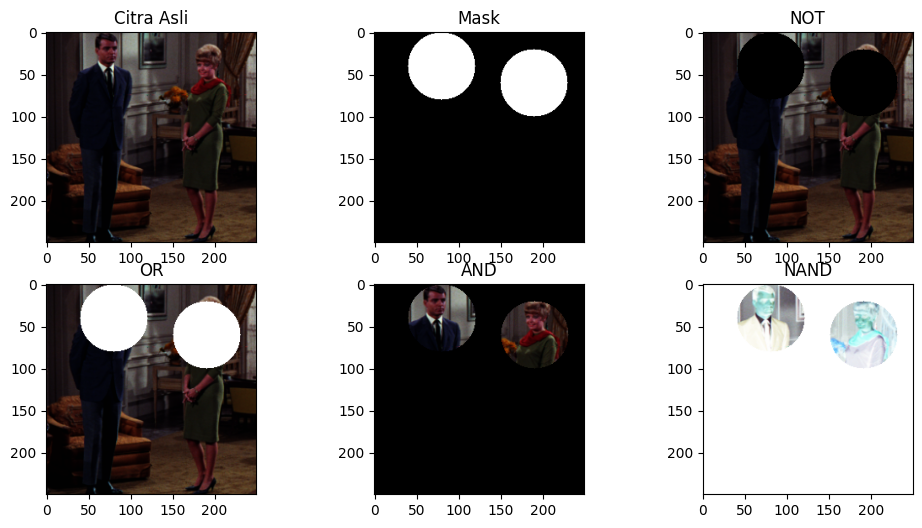

In [35]:
img = cv.imread('/content/gdrive/MyDrive/PCVK_img/couple.tiff')
img = cv.resize(img, (250, 250))

mask = np.zeros((250, 250), dtype="uint8")
cv.circle(mask, (80, 40), 40, 255, -1)
cv.circle(mask, (190, 60), 40, 255, -1)

mask_3 = cv.merge([mask, mask, mask])

# 1. NOT (komplemen)
not_mask = cv.bitwise_not(mask_3)
not_result = cv.bitwise_and(img, not_mask)

# 2. OR
or_result = cv.bitwise_or(img, mask_3)

# 3. AND
and_result = cv.bitwise_and(img, mask_3)

# 4. NAND (Not AND)
nand_result = cv.bitwise_not(and_result)

titles = ['Citra Asli', 'Mask', 'NOT', 'OR', 'AND', 'NAND']
images = [img, mask_3, not_result, or_result, and_result, nand_result]

plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i])
plt.show()


**Analisa**

*   Mask berperan sebagai filter untuk menentukan bagian citra yang diproses.
*   AND dan OR digunakan untuk menonjolkan atau mengambil area tertentu.
*   NOT dan NAND digunakan untuk membalik efek atau menciptakan efek negatif.